Starting CA Algorithm:
Iteration number: 3, Cluster number: 29
Iteration number: 4, Cluster number: 27
Iteration number: 5, Cluster number: 18
Iteration number: 6, Cluster number: 17
Iteration number: 7, Cluster number: 12
Iteration number: 8, Cluster number: 9
Iteration number: 9, Cluster number: 9
Iteration number: 10, Cluster number: 7
Iteration number: 11, Cluster number: 7
Iteration number: 12, Cluster number: 7
Iteration number: 13, Cluster number: 7
Iteration number: 14, Cluster number: 7
Iteration number: 15, Cluster number: 7
Iteration number: 16, Cluster number: 7
Iteration number: 17, Cluster number: 7
Iteration number: 18, Cluster number: 7
Iteration number: 19, Cluster number: 7
Iteration number: 20, Cluster number: 7
Iteration number: 21, Cluster number: 7
Iteration number: 22, Cluster number: 7
Iteration number: 23, Cluster number: 7
Iteration number: 24, Cluster number: 7
Iteration number: 25, Cluster number: 7
Iteration number: 26, Cluster number: 7
Iteration number: 2

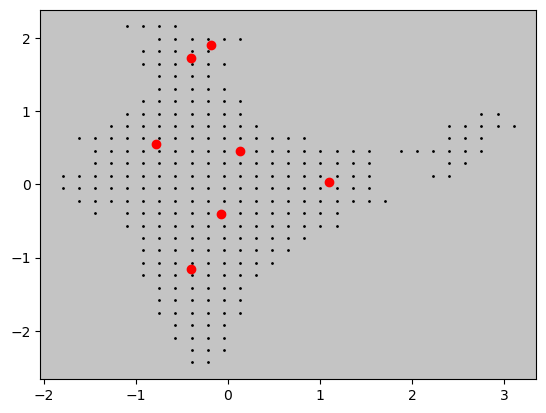

In [1]:
from CA_RUN import CA_RUN
from CA import InitializeCenters as IC
#from EM_RUN import EM_RUN
from plot import plot
import pandas as pd
import numpy as np
import time

if __name__ == '__main__':
    in_data = pd.read_csv('data/A1-Dataset/Final Dataset - one.csv', header=None)
    #actual_clusters = pd.read_csv("data/A1-Dataset/a1-ga-cb.csv", header=None)
    # Graph the location of the actual clusters
    #plot(in_data, actual_clusters=actual_clusters, save=True, save_name="result_plots/actual_plot.png", show=False)
    
    cluster_num = 30
    vector_num = in_data.shape[0]
    dimensions = in_data.shape[1]
    
    #Creating centers
    centers = np.zeros([cluster_num, dimensions])
    
    #Creating point list
    class Point():
     def __init__(self, membership, distance, dimension, cluster):
        self.membership = membership
        self.distance = distance
        self.dimension = dimension
        self.cluster = cluster
    point_list = []
    for i in range(0, vector_num):
        point_list.insert(i,Point(np.zeros(cluster_num), 
                        np.zeros(cluster_num), np.zeros(dimensions), None))
    # Populate
    for i in range(0, dimensions):
        for j in range(0, vector_num):
            point_list[j].dimension[i] = in_data.iloc[j,i]
    
    IC(centers, point_list, cluster_num, vector_num, dimensions)
    
    
    # Run EM and make a graph
   # EM_cluster_num, EM_center_list = EM_RUN(NumClust=30)
   # plot(in_data, cluster_num1=EM_cluster_num, center_list1=EM_center_list, save=True, save_name="result_plots/EM_plot.png", color=("orange",), show=False)
    
    # Run CA and make a graph
    CA_cluster_num, CA_center_list, CA_classification_list, MMembership = CA_RUN(cluster_num=30)
    plot(in_data, cluster_num1=CA_cluster_num, center_list1=CA_center_list, save=True, save_name="result_plots/CA_plot.png", color=("red",), show=False)
    d = pd.DataFrame(CA_classification_list)
    d.to_csv("third trial.csv", index=False, header=None)
    e = pd.DataFrame(MMembership)
    e.to_csv("Membership_thirdtrial.csv", index=False, header=None)
    
    #"""
    # Plot everything together (actual cluster centers, EM Clusters, CA Clusters)
   # plot(in_data, actual_clusters=actual_clusters, 
        #cluster_num1=CA_cluster_num, center_list1=CA_center_list,
        #cluster_num2=EM_cluster_num, center_list2=EM_center_list,
       # save=True, save_name="result_plots/everything_plot.png", show=False)
    #"""

    print("Finished running both algorithms. Please check result_plots folder for plots.")

    """
    timing = dict()
    for i in range(1,100):
        timing[i] = []
        for j in range(0,3):
            timing[i].append(CA_RUN(cluster_num=i))

    df = pd.DataFrame.from_dict(timing)
    df.to_csv("timing.csv", index=False, header=None)
    """